<a href="https://www.kaggle.com/code/tanyaarya19/digit-recognizer-2023?scriptVersionId=153109616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return (np.exp(Z)/sum(np.exp(Z)))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2,W1, W2,X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db1 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * (Z1>0) #Derivative of ReLU
    dW1 = 1/m * dZ1.dot(X.T)
    db2 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2  

In [6]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2,W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ",i)
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions,Y))
    return W1, b1, W2, b2
    

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)

Iteration:  0
[7 7 9 ... 8 7 8] [3 2 3 ... 5 6 1]
Accuracy:  0.13346341463414635
Iteration:  10
[7 3 8 ... 0 7 8] [3 2 3 ... 5 6 1]
Accuracy:  0.18485365853658536
Iteration:  20
[7 3 9 ... 0 7 8] [3 2 3 ... 5 6 1]
Accuracy:  0.25470731707317074
Iteration:  30
[7 1 1 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.2897560975609756
Iteration:  40
[7 1 1 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.32765853658536587
Iteration:  50
[7 1 1 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.3645853658536585
Iteration:  60
[1 3 1 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.4059756097560976
Iteration:  70
[1 3 3 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.4564146341463415
Iteration:  80
[3 3 3 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.506
Iteration:  90
[3 3 3 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.5392439024390244
Iteration:  100
[3 3 3 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.5622682926829269
Iteration:  110
[3 3 3 ... 0 7 1] [3 2 3 ... 5 6 1]
Accuracy:  0.582780487804878
Iteration:  120
[3 3 3 ... 5 7 1] [3 

85% accuracy on the training set

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:,index,None]
    prediction = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ",label)
    
    current_image = current_image.reshape((28,28))
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Examples:

Prediction:  [3]
Label:  3


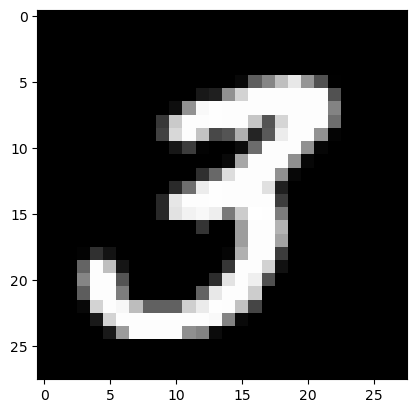

Prediction:  [2]
Label:  2


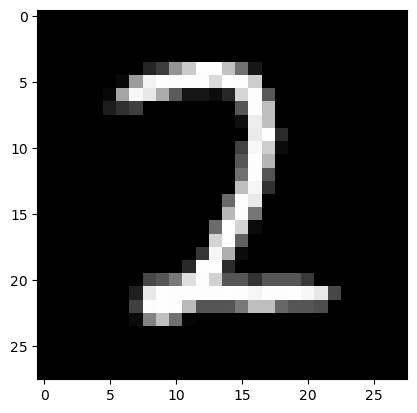

Prediction:  [3]
Label:  3


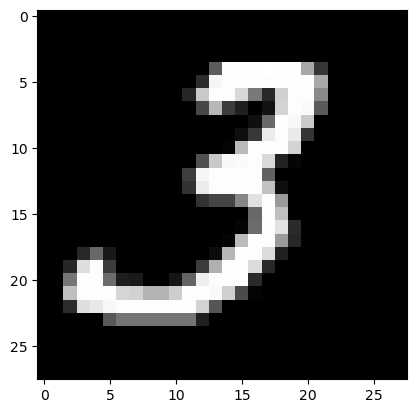

Prediction:  [0]
Label:  0


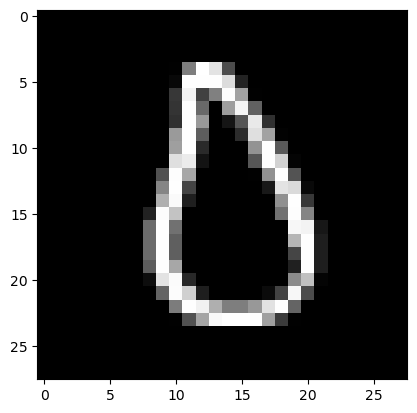

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Accuracy of the dev set:

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 4 2 2 8 7 7 6 7 6 7 6 3 8 0 9 2 9 3 2 8 0 7 9 9 3 2 2 5 6 1 8 7 1 1 9 9
 0 3 7 6 2 2 8 9 2 2 6 8 0 8 4 0 8 2 5 8 8 6 9 1 7 9 2 7 0 9 1 0 5 7 4 0 3
 6 5 3 1 2 9 9 7 4 1 3 3 4 8 7 1 6 6 2 2 8 6 4 6 0 6 0 0 9 7 0 3 8 8 6 4 1
 0 6 4 0 5 4 4 4 5 4 6 0 3 3 8 4 0 9 3 0 7 9 4 4 9 3 3 7 7 9 6 4 1 4 1 4 6
 3 0 2 9 6 7 1 8 8 9 1 0 1 9 7 1 6 3 1 4 9 1 4 8 7 3 6 5 1 8 3 8 9 0 2 9 1
 3 9 1 9 1 4 6 3 9 9 0 4 5 9 6 7 1 0 8 3 7 2 0 0 8 3 7 7 8 2 9 8 3 9 4 0 3
 8 4 0 9 7 3 3 1 2 9 0 8 3 8 5 4 9 4 8 3 9 2 3 7 1 4 7 9 6 7 4 6 3 4 5 9 6
 6 6 0 4 6 9 7 1 4 9 2 3 6 0 5 7 0 7 0 4 8 8 3 2 5 4 1 8 6 5 2 5 3 3 7 9 1
 1 8 3 6 4 7 4 7 9 4 0 6 7 8 8 5 8 2 7 2 2 4 9 8 3 6 6 4 7 4 4 4 3 1 3 2 3
 6 5 3 1 4 5 3 7 9 6 0 2 9 7 5 4 8 5 5 6 7 8 0 4 5 2 6 9 7 4 7 4 8 3 9 8 5
 4 2 2 8 7 7 7 2 5 9 2 3 9 5 9 8 8 0 7 6 4 2 4 7 8 7 1 4 0 4 2 7 3 9 2 9 6
 3 2 5 9 5 7 8 0 3 7 7 7 7 0 9 7 3 4 5 2 3 2 4 7 9 8 5 2 1 2 1 3 5 9 8 1 8
 2 6 9 1 3 4 1 1 5 6 3 9 5 4 4 8 3 8 7 8 8 1 1 4 2 8 4 4 8 1 1 6 6 1 3 9 5
 9 8 0 4 6 4 5 3 1 3 8 6 

0.827